In [1]:
%matplotlib nbagg
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
primary = pd.read_csv("data/2016_presidential_election/primary_results.csv",sep=",")

In [3]:
counties = pd.read_csv("data/2016_presidential_election/county_facts.csv",sep=",")

In [4]:
primary.head()

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
0,Alabama,AL,Autauga,1001,Republican,Donald Trump,5387,0.445
1,Alabama,AL,Autauga,1001,Republican,Ted Cruz,2482,0.205
2,Alabama,AL,Autauga,1001,Republican,Marco Rubio,1785,0.148
3,Alabama,AL,Autauga,1001,Republican,Ben Carson,1764,0.146
4,Alabama,AL,Autauga,1001,Republican,John Kasich,421,0.035


In [5]:
counties.head()

,fips,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,...,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
0,0,United States,NaN,318857056,308758105,3.3,308745538,6.2,23.1,14.5,...,8.3,28.8,5319456312,4174286516,3917663456,12990,613795732,1046363,3531905.43,87.4
1,1000,Alabama,NaN,4849377,4780127,1.4,4779736,6.1,22.8,15.3,...,1.2,28.1,112858843,52252752,57344851,12364,6426342,13369,50645.33,94.4
2,1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.2,13.8,...,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
3,1003,Baldwin County,AL,200111,182265,9.8,182265,5.6,22.2,18.7,...,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6
4,1005,Barbour County,AL,26887,27457,-2.1,27457,5.7,21.2,16.5,...,0.0,27.0,0,0,188337,6334,0,8,884.88,31.0


In [6]:
primary.columns

Index(['state', 'state_abbreviation', 'county', 'fips', 'party', 'candidate',
       'votes', 'fraction_votes'],
      dtype='object')

In [7]:
primary.shape

(13212, 8)

In [8]:
counties.columns

Index(['fips', 'area_name', 'state_abbreviation', 'PST045214', 'PST040210',
       'PST120214', 'POP010210', 'AGE135214', 'AGE295214', 'AGE775214',
       'SEX255214', 'RHI125214', 'RHI225214', 'RHI325214', 'RHI425214',
       'RHI525214', 'RHI625214', 'RHI725214', 'RHI825214', 'POP715213',
       'POP645213', 'POP815213', 'EDU635213', 'EDU685213', 'VET605213',
       'LFE305213', 'HSG010214', 'HSG445213', 'HSG096213', 'HSG495213',
       'HSD410213', 'HSD310213', 'INC910213', 'INC110213', 'PVY020213',
       'BZA010213', 'BZA110213', 'BZA115213', 'NES010213', 'SBO001207',
       'SBO315207', 'SBO115207', 'SBO215207', 'SBO515207', 'SBO415207',
       'SBO015207', 'MAN450207', 'WTN220207', 'RTN130207', 'RTN131207',
       'AFN120207', 'BPS030214', 'LND110210', 'POP060210'],
      dtype='object')

In [9]:
counties.shape

(3195, 54)

In [10]:
primary.head()

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
0,Alabama,AL,Autauga,1001,Republican,Donald Trump,5387,0.445
1,Alabama,AL,Autauga,1001,Republican,Ted Cruz,2482,0.205
2,Alabama,AL,Autauga,1001,Republican,Marco Rubio,1785,0.148
3,Alabama,AL,Autauga,1001,Republican,Ben Carson,1764,0.146
4,Alabama,AL,Autauga,1001,Republican,John Kasich,421,0.035


In [11]:
primary["candidate"].unique()

array(['Donald Trump', 'Ted Cruz', 'Marco Rubio', 'Ben Carson',
       'John Kasich', 'Hillary Clinton', 'Bernie Sanders', 'Carly Fiorina',
       'Rand Paul', 'Mike Huckabee', 'Rick Santorum', 'Jeb Bush',
       'Chris Christie', "Martin O'Malley", ' Uncommitted',
       ' No Preference'], dtype=object)

In [12]:
primary.groupby("candidate")["votes"].sum()
#각 후보 별 전체 득표수 계산하기

candidate
 No Preference         313
 Uncommitted            43
Ben Carson          528463
Bernie Sanders     4740278
Carly Fiorina        15181
Chris Christie       24347
Donald Trump       6944654
Hillary Clinton    7178257
Jeb Bush             94394
John Kasich        2456406
Marco Rubio        2998335
Martin O'Malley        747
Mike Huckabee         3300
Rand Paul             8460
Rick Santorum         1773
Ted Cruz           5248807
Name: votes, dtype: int64

In [13]:
candidate_to_votes = primary.groupby("candidate")["votes"].sum().sort_values()

In [14]:
candidate_to_votes

candidate
 Uncommitted            43
 No Preference         313
Martin O'Malley        747
Rick Santorum         1773
Mike Huckabee         3300
Rand Paul             8460
Carly Fiorina        15181
Chris Christie       24347
Jeb Bush             94394
Ben Carson          528463
John Kasich        2456406
Marco Rubio        2998335
Bernie Sanders     4740278
Ted Cruz           5248807
Donald Trump       6944654
Hillary Clinton    7178257
Name: votes, dtype: int64

<IPython.core.display.Javascript object>


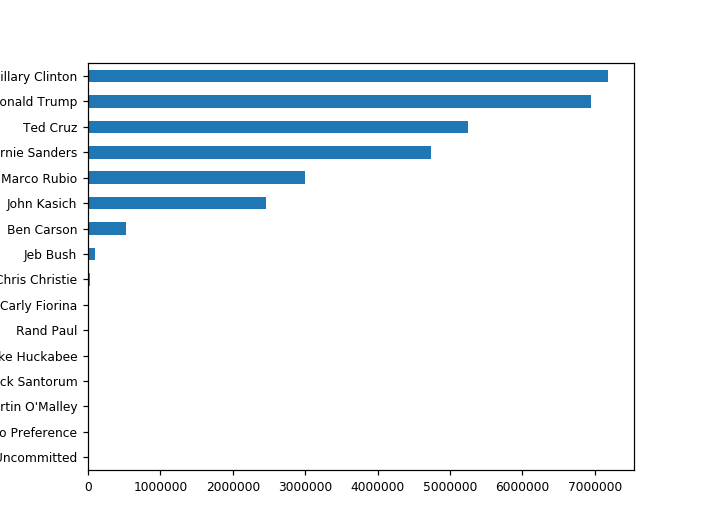

In [15]:
candidate_to_votes.plot(kind="barh", fontsize=8)

In [16]:
primary.head()

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
0,Alabama,AL,Autauga,1001,Republican,Donald Trump,5387,0.445
1,Alabama,AL,Autauga,1001,Republican,Ted Cruz,2482,0.205
2,Alabama,AL,Autauga,1001,Republican,Marco Rubio,1785,0.148
3,Alabama,AL,Autauga,1001,Republican,Ben Carson,1764,0.146
4,Alabama,AL,Autauga,1001,Republican,John Kasich,421,0.035


In [20]:
state_party_to_votes = primary.groupby(["state","party"])["votes"].sum()
#각 주별, 각 정당의 득표 비율 계산하기
#앞에 ()는 그룹화하는 것들, 뒤에 []는 값을 추출하는 것

In [21]:
state_party_to_votes.head()

state     party     
Alabama   Democrat      381810
          Republican    805814
Arizona   Democrat      399097
          Republican    435103
Arkansas  Democrat      207182
Name: votes, dtype: int64

In [23]:
state_to_votes_s = primary.groupby("state")["votes"].sum()
#각 주별 투표한 수 구하기

In [24]:
state_to_votes_s.head()

state
Alabama     1187624
Arizona      834200
Arkansas     602290
Colorado     121184
Florida     3767915
Name: votes, dtype: int64

In [25]:
state_party_to_vote_pcts_s =  state_party_to_votes / state_to_votes_s
#각 정당 득표 나누기 전체 투표수로 각 정당 득표 퍼센트 구하기

In [50]:
state_party_to_vote_pcts_s.head()

state     party     
Alabama   Democrat      0.321491
          Republican    0.678509
Arizona   Democrat      0.478419
          Republican    0.521581
Arkansas  Democrat      0.343990
Name: votes, dtype: float64

In [51]:
state_party_to_vote_pcts_s.unstack()

party,Democrat,Republican
state,,
Alabama,0.321491,0.678509
Arizona,0.478419,0.521581
Arkansas,0.343990,0.656010
Colorado,1.000000,NaN
Florida,0.427721,0.572279
Georgia,0.342714,0.657286
Idaho,0.100263,0.899737
Illinois,0.427667,0.572333
Iowa,0.429540,0.570460


<IPython.core.display.Javascript object>


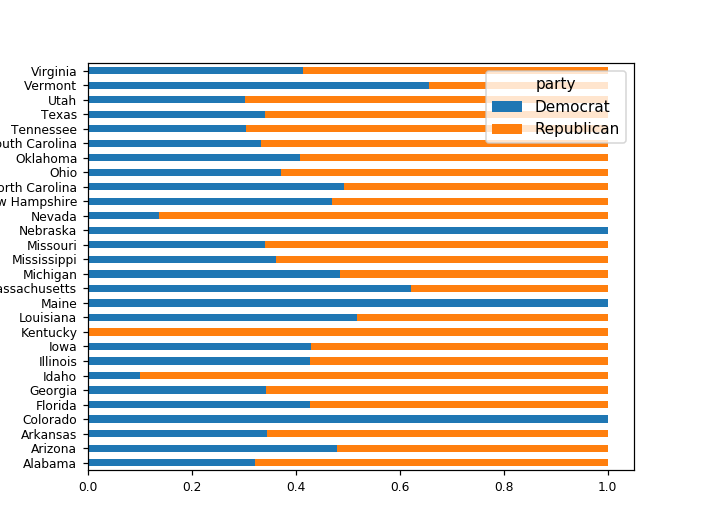

In [27]:
state_party_to_vote_pcts_s.unstack().plot(kind="barh", stacked=True, fontsize=8)
#unstack은 최하위 인덱스를 최하위 컬럼으로 올린다

In [49]:
func = lambda agg_df: agg_df.sort_values("votes", ascending=False).iloc[0]
#사용자 지정 함수로 식 만들기
#득표로 정렬한 후에 첫번째 항(가장 많이 득표한 사람)을 뽑아 내는 식

In [29]:
primary.head()

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
0,Alabama,AL,Autauga,1001,Republican,Donald Trump,5387,0.445
1,Alabama,AL,Autauga,1001,Republican,Ted Cruz,2482,0.205
2,Alabama,AL,Autauga,1001,Republican,Marco Rubio,1785,0.148
3,Alabama,AL,Autauga,1001,Republican,Ben Carson,1764,0.146
4,Alabama,AL,Autauga,1001,Republican,John Kasich,421,0.035


In [31]:
winners = primary.groupby("fips").agg(func)

In [32]:
winners.head()

,state,state_abbreviation,county,party,candidate,votes,fraction_votes
fips,,,,,,,
1001,Alabama,AL,Autauga,Republican,Donald Trump,5387,0.445
1003,Alabama,AL,Baldwin,Republican,Donald Trump,23618,0.469
1005,Alabama,AL,Barbour,Democrat,Hillary Clinton,2567,0.906
1007,Alabama,AL,Bibb,Republican,Donald Trump,1959,0.494
1009,Alabama,AL,Blount,Republican,Donald Trump,7390,0.487


In [34]:
counties.head()

,fips,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,...,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
0,0,United States,NaN,318857056,308758105,3.3,308745538,6.2,23.1,14.5,...,8.3,28.8,5319456312,4174286516,3917663456,12990,613795732,1046363,3531905.43,87.4
1,1000,Alabama,NaN,4849377,4780127,1.4,4779736,6.1,22.8,15.3,...,1.2,28.1,112858843,52252752,57344851,12364,6426342,13369,50645.33,94.4
2,1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.2,13.8,...,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
3,1003,Baldwin County,AL,200111,182265,9.8,182265,5.6,22.2,18.7,...,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6
4,1005,Barbour County,AL,26887,27457,-2.1,27457,5.7,21.2,16.5,...,0.0,27.0,0,0,188337,6334,0,8,884.88,31.0


In [35]:
counties[["fips","RHI825214"]].head()

,fips,RHI825214
0,0,62.1
1,1000,66.2
2,1001,75.6
3,1003,83.0
4,1005,46.6


In [36]:
winners_county_races = pd.merge(winners, counties[["fips", "RHI825214"]], 
                                left_index=True, right_on="fips", how="left")

In [37]:
winners_county_races.head()

,state,state_abbreviation,county,party,candidate,votes,fraction_votes,fips,RHI825214
2,Alabama,AL,Autauga,Republican,Donald Trump,5387,0.445,1001,75.6
3,Alabama,AL,Baldwin,Republican,Donald Trump,23618,0.469,1003,83.0
4,Alabama,AL,Barbour,Democrat,Hillary Clinton,2567,0.906,1005,46.6
5,Alabama,AL,Bibb,Republican,Donald Trump,1959,0.494,1007,74.5
6,Alabama,AL,Blount,Republican,Donald Trump,7390,0.487,1009,87.8


In [39]:
winners_county_races = winners_county_races.rename(columns={"RHI825214":"white_pcts"})
#RHI825214의 칼럼 이름을 변경한다

In [40]:
winners_county_races.head()

,state,state_abbreviation,county,party,candidate,votes,fraction_votes,fips,white_pcts
2,Alabama,AL,Autauga,Republican,Donald Trump,5387,0.445,1001,75.6
3,Alabama,AL,Baldwin,Republican,Donald Trump,23618,0.469,1003,83.0
4,Alabama,AL,Barbour,Democrat,Hillary Clinton,2567,0.906,1005,46.6
5,Alabama,AL,Bibb,Republican,Donald Trump,1959,0.494,1007,74.5
6,Alabama,AL,Blount,Republican,Donald Trump,7390,0.487,1009,87.8


In [41]:
 winners_county_white_pcts = winners_county_races.groupby(["party", "candidate"])["white_pcts"].mean()

In [42]:
winners_county_white_pcts.head()

party       candidate      
Democrat    Bernie Sanders     81.944030
            Hillary Clinton    56.856920
Republican  Ben Carson         81.100000
            Donald Trump       83.235638
            John Kasich        89.226415
Name: white_pcts, dtype: float64

<IPython.core.display.Javascript object>


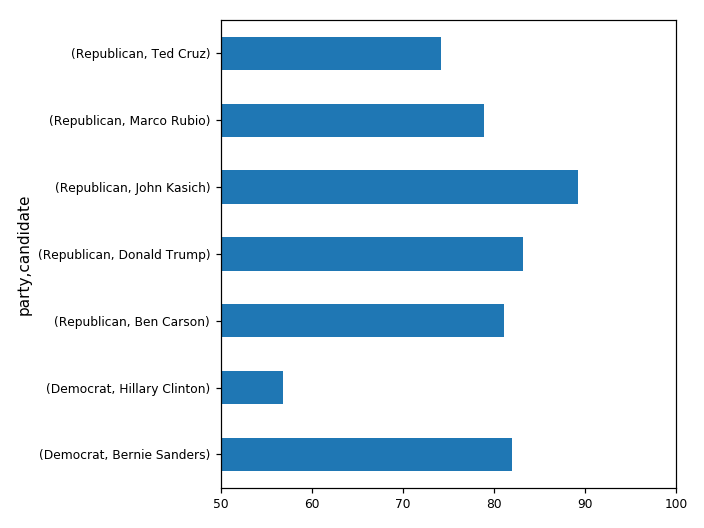

In [43]:
ax = winners_county_white_pcts.plot(kind="barh", fontsize=8)

In [44]:
ax.set_xlim([50, 100])
plt.tight_layout()

In [45]:
#피벗 테이블 (pivot table)

In [46]:
total_votes = primary.pivot_table(values="votes", index="state", 
                                  columns="candidate", aggfunc="sum", 
                                  fill_value=0)
# values = 기준 , index, columns = 피벗테이블의 행열를 지정, aggfunc = 적용할 통계함수 (ex = sum, mean), fill_value = nan이 나왔을때 대처하는 문자 지정

In [47]:
total_votes

candidate,No Preference,Uncommitted,Ben Carson,Bernie Sanders,Carly Fiorina,Chris Christie,Donald Trump,Hillary Clinton,Jeb Bush,John Kasich,Marco Rubio,Martin O'Malley,Mike Huckabee,Rand Paul,Rick Santorum,Ted Cruz
state,,,,,,,,,,,,,,,,
Alabama,0,0,84139,74987,0,0,356892,306823,0,37127,154379,0,0,0,0,173277
Arizona,0,0,0,163400,0,0,249916,235697,0,53040,0,0,0,0,0,132147
Arkansas,0,0,23105,64514,0,0,132546,142668,0,15079,100999,0,0,0,0,123379
Colorado,0,0,0,71928,0,0,0,49256,0,0,0,0,0,0,0,0
Florida,0,0,0,547051,0,0,1015451,1064566,0,150167,607491,0,0,0,0,383189
Georgia,0,0,78731,181760,0,0,490566,460660,0,66740,297748,0,0,0,0,298304
Idaho,0,0,0,18550,0,0,60810,5017,0,16251,34976,0,0,0,0,99447
Illinois,0,0,0,354344,0,0,350991,304632,0,153761,72233,0,0,0,0,304903
Iowa,0,43,17173,69311,3475,3278,45163,69581,5221,3466,42883,747,3300,8460,1773,51316


In [48]:
primary.pivot_table(values="fraction_votes", index="state_abbreviation", 
                    columns="party", aggfunc="mean")

party,Democrat,Republican
state_abbreviation,,
AL,0.476823,0.195277
AR,0.464784,0.191924
AZ,0.478433,0.283867
CO,0.481016,NaN
FL,0.469349,0.242413
GA,0.493525,0.196939
IA,0.250003,0.090857
ID,0.494733,0.240773
IL,0.489632,0.242013
